In [2]:
# !pip install altair vega_datasets

In [14]:
from pymongo import MongoClient
import json
from collections import Counter
import glob
import os
from pathlib import Path
from datetime import datetime
# from PIL import Image
import altair as alt
import pandas as pd

from IPython.display import display, Image, HTML
from ipywidgets import HBox
import ipywidgets

In [15]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [16]:
images_dir = Path('./images')

In [17]:
mongo = MongoClient('172.17.0.1', 27017)
db = mongo['bad-vis']
posts = db['posts']
imagefiles = db['imagefiles']
imagemeta = db['imagemeta']
imagededup = db['imagededup']
visimages = db['visimages']

In [18]:
visImages = [i for i in visimages.find()]

In [19]:
after_date = datetime(2020, 1, 1)

In [20]:
after_date

datetime.datetime(2020, 1, 1, 0, 0)

In [26]:
visImagesAfter = [i for i in visImages if datetime.fromtimestamp(i['datetime']) > after_date]

In [27]:
len(visImagesAfter)

557

In [28]:
imageFiles = [f for f in imagededup.find()]

In [29]:
imageFileSizes = [f['size'] for f in imageFiles]

In [30]:
df_imageFileSizes = pd.DataFrame([{'id': f['short_image_id'], 'size': f['size']} for f in imageFiles])

In [31]:
sum(df_imageFileSizes['size'] > 1000000)

401

In [32]:
alt.Chart(df_imageFileSizes).mark_bar().encode(
    alt.X('size:Q', bin=alt.Bin(extent=[0, 1000000])),
    y='count()'
)

alt.Chart(...)

In [33]:
imageFileSizes[0]

22181

In [34]:
i = imagededup.find_one()

In [35]:
i['url'].split('/')

['https:',
 '',
 'reddit.com',
 'r',
 'dataisugly',
 'comments',
 '44dueg',
 'look_at_that_huge_difference_in_height_s',
 '']

In [36]:
Counter([i['url'].split('/')[4] for i in imagededup.find() if i['url'].split('/')[4] == 'reddit.com']).most_common()

[]

In [37]:
Counter([i['source'] for i in imagededup.find()]).most_common()

[('dataisugly', 5840)]

In [38]:
# [i for i in imagededup.find() if i['url'].split('/')[4] == 'memes']

In [39]:
len({f['image_id'] for f in imagefiles.find({'image_type': 'manual'})})

0

In [40]:
len({f['post_id'] for f in imagefiles.find({'image_type': 'manual'})})

0

In [41]:
invalid_post_ids = set(json.load(open('handmade/invalid_post_ids.json')))
for pid in invalid_post_ids:
    short_id = pid.split('/')[-1]
    i = posts.find_one({'id': short_id})
    url = i['url']
    display(HTML(f"<a href={url}>{url}</a>"))

In [42]:
short_ids = [
    'a693we',
]

# short_id = short_ids[0]

# short_id = '27m45k'
for short_id in short_ids:
    if '_' in short_id:
        short_id = short_id.split('_')[0]
    i = imagededup.find_one({'id': short_id})
    print(i['phash'])
    url = f"https://www.reddit.com/r/dataisugly/comments/{short_id}"
    display(HTML(f"<a href={url}>{url}</a>"))
    #     display(HTML(f"<a href={i['external_link_url']}>{i['external_link_url']}</a>"))
    #     archive_url = f"http://web.archive.org/web/*/{i['external_link_url']}"
    #     display(HTML(f"<a href={archive_url}>{archive_url}</a>"))
    display(HBox([ipywidgets.Image(value=open(i['file_path'], 'rb').read(), height=100, width=100) for i in imagefiles.find({'id': short_id})]))

9fc147cf20b867c8


HBox()

In [43]:
short_id = '2wwxuy_1'
if '_' in short_id:
    short_id = short_id.split('_')[0]
i = posts.find_one({'id': short_id})
url = i['url']
display(HTML(f"<a href={url}>{url}</a>"))
display(HTML(f"<a href={i['external_link']}>{i['external_link']}</a>"))
archive_url = f"http://web.archive.org/web/*/{i['external_link']}"
display(HTML(f"<a href={archive_url}>{archive_url}</a>"))

reddit/dataisugly/2wwxuy_5 reddit/dataisugly/2wwxuy c0943f633f4fe094 ['reddit/dataisugly/2wwxuy_3', 'reddit/dataisugly/2wwxuy_9', 'reddit/dataisugly/2wwxuy_8', 'reddit/dataisugly/2wwxuy_1', 'reddit/dataisugly/2wwxuy_7', 'reddit/dataisugly/2wwxuy_6', 'reddit/dataisugly/2wwxuy_2', 'reddit/dataisugly/2wwxuy_10', 'reddit/dataisugly/2wwxuy_4', 'reddit/dataisugly/2wwxuy_0'] [] []


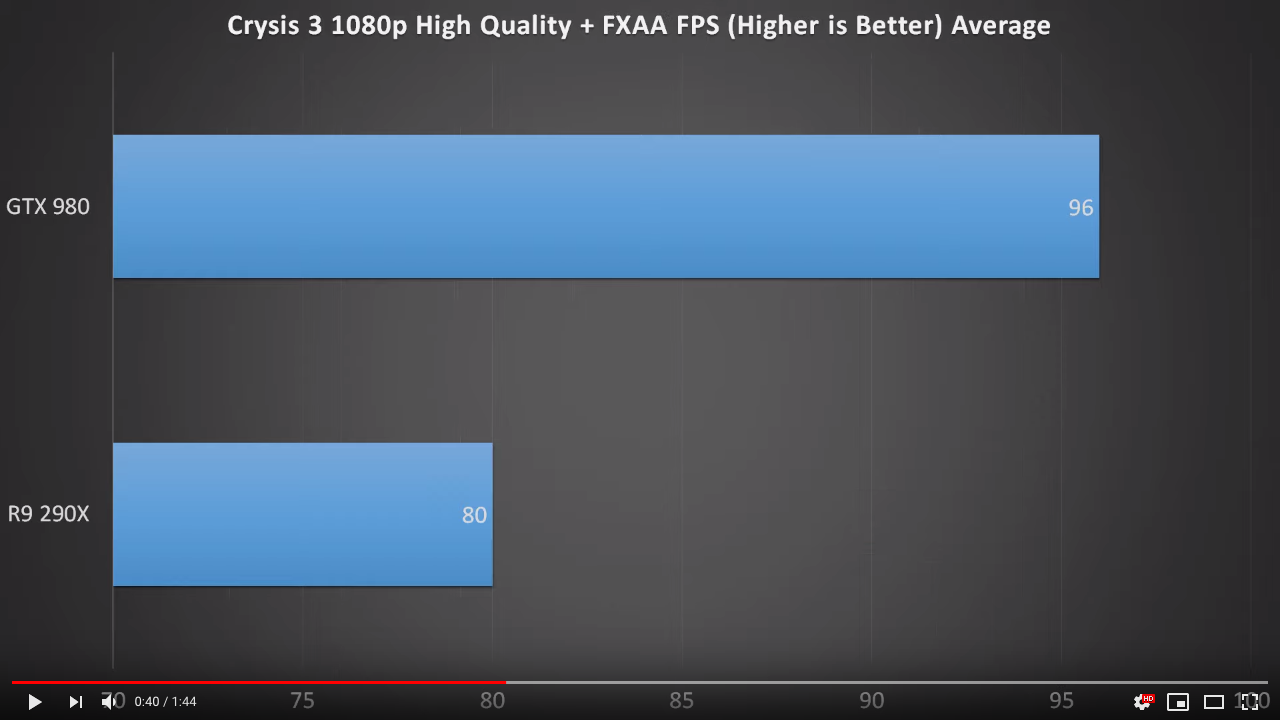

reddit/dataisugly/2wwxuy_3 reddit/dataisugly/2wwxuy c0953fca3f5ac095 ['reddit/dataisugly/2wwxuy_9', 'reddit/dataisugly/2wwxuy_8', 'reddit/dataisugly/2wwxuy_1', 'reddit/dataisugly/2wwxuy_7', 'reddit/dataisugly/2wwxuy_6', 'reddit/dataisugly/2wwxuy_2', 'reddit/dataisugly/2wwxuy_10', 'reddit/dataisugly/2wwxuy_5', 'reddit/dataisugly/2wwxuy_4', 'reddit/dataisugly/2wwxuy_0'] [] []


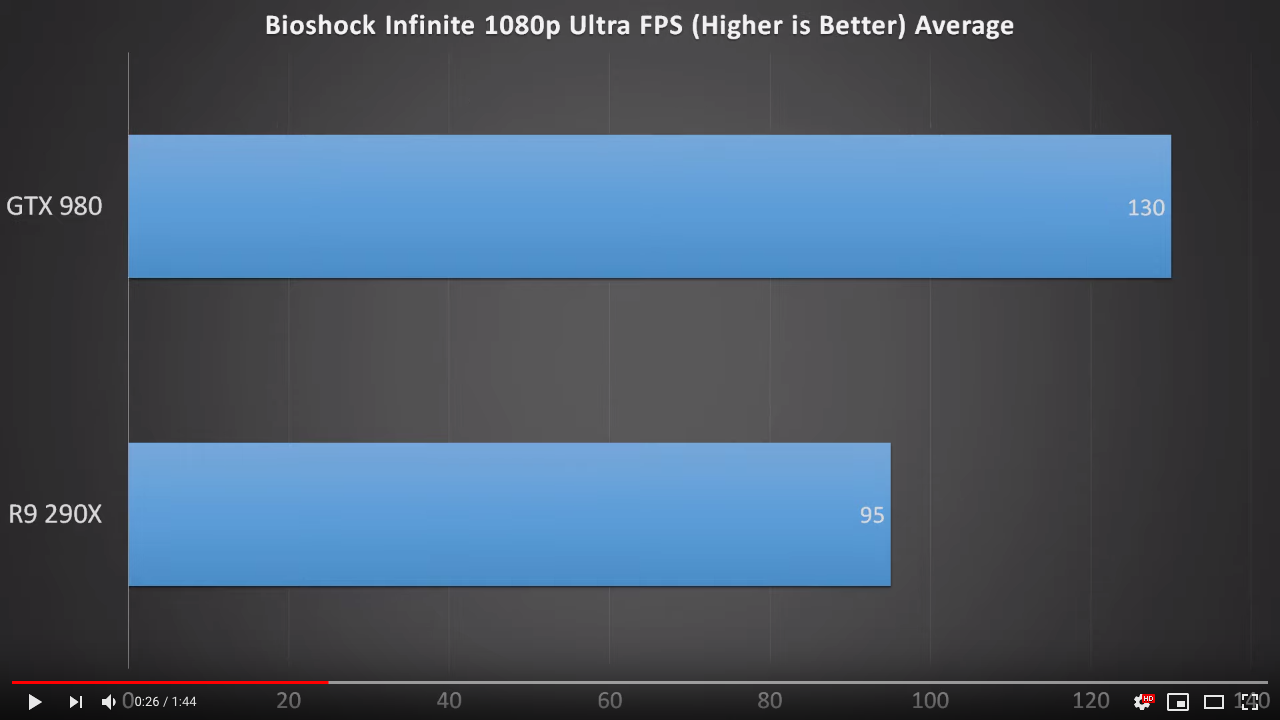

reddit/dataisugly/2wwxuy_10 reddit/dataisugly/2wwxuy c0953fd83b6c68d2 ['reddit/dataisugly/2wwxuy_3', 'reddit/dataisugly/2wwxuy_9', 'reddit/dataisugly/2wwxuy_8', 'reddit/dataisugly/2wwxuy_1', 'reddit/dataisugly/2wwxuy_7', 'reddit/dataisugly/2wwxuy_6', 'reddit/dataisugly/2wwxuy_2', 'reddit/dataisugly/2wwxuy_5', 'reddit/dataisugly/2wwxuy_4', 'reddit/dataisugly/2wwxuy_0'] [] []


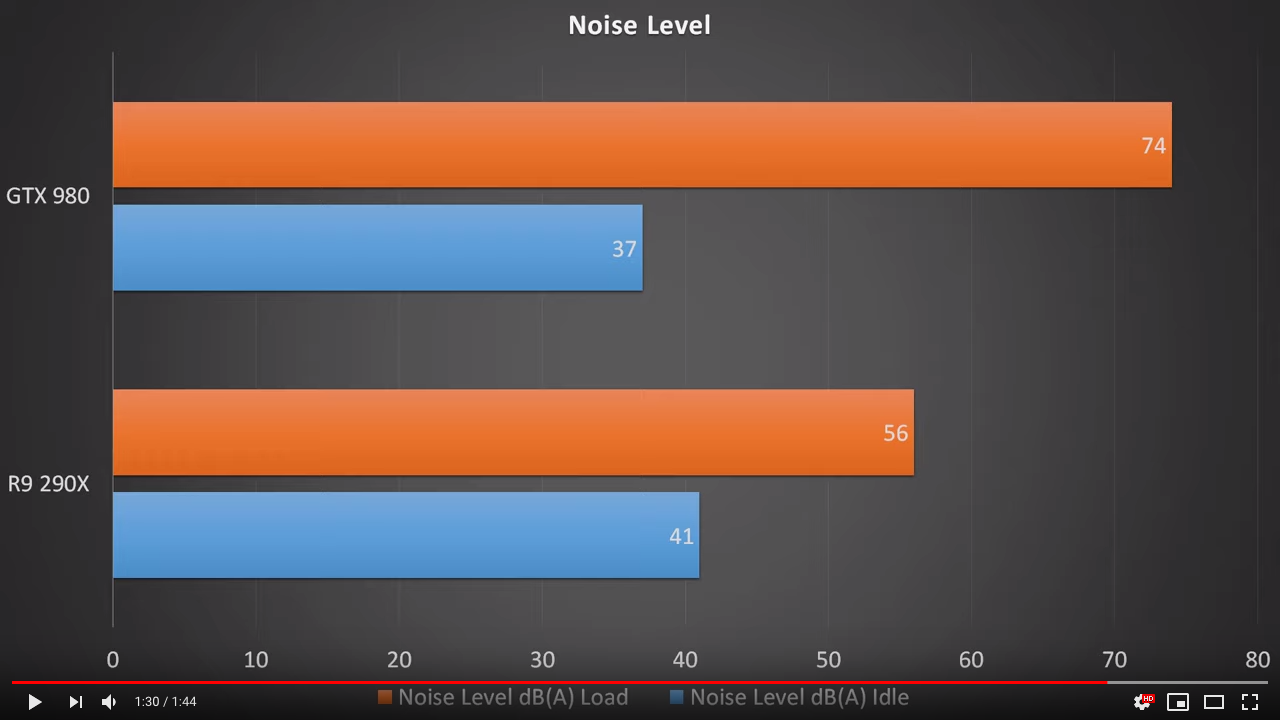

reddit/dataisugly/2wwxuy_4 reddit/dataisugly/2wwxuy d0952fca2f4bd095 ['reddit/dataisugly/2wwxuy_3', 'reddit/dataisugly/2wwxuy_9', 'reddit/dataisugly/2wwxuy_8', 'reddit/dataisugly/2wwxuy_1', 'reddit/dataisugly/2wwxuy_7', 'reddit/dataisugly/2wwxuy_6', 'reddit/dataisugly/2wwxuy_2', 'reddit/dataisugly/2wwxuy_10', 'reddit/dataisugly/2wwxuy_5', 'reddit/dataisugly/2wwxuy_0'] [] []


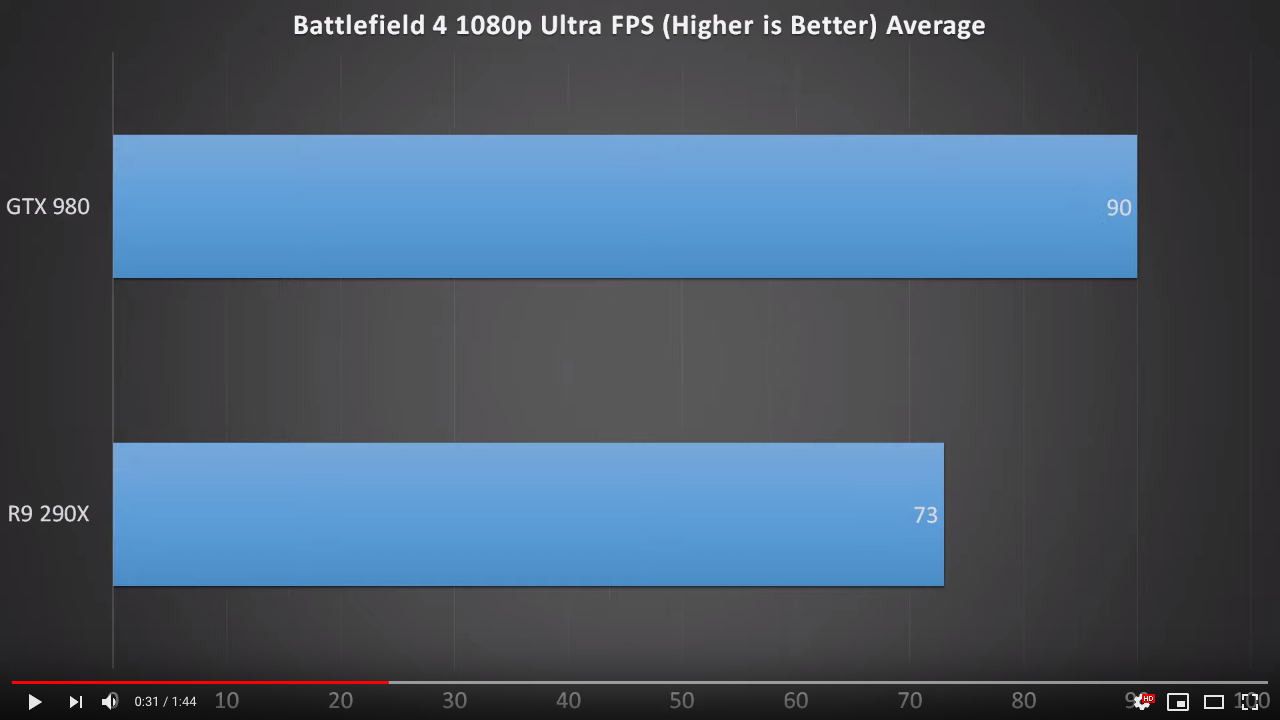

reddit/dataisugly/2wwxuy_9 reddit/dataisugly/2wwxuy c0d03e8c3f6b61b5 ['reddit/dataisugly/2wwxuy_3', 'reddit/dataisugly/2wwxuy_8', 'reddit/dataisugly/2wwxuy_1', 'reddit/dataisugly/2wwxuy_7', 'reddit/dataisugly/2wwxuy_6', 'reddit/dataisugly/2wwxuy_2', 'reddit/dataisugly/2wwxuy_10', 'reddit/dataisugly/2wwxuy_5', 'reddit/dataisugly/2wwxuy_4', 'reddit/dataisugly/2wwxuy_0'] [] []


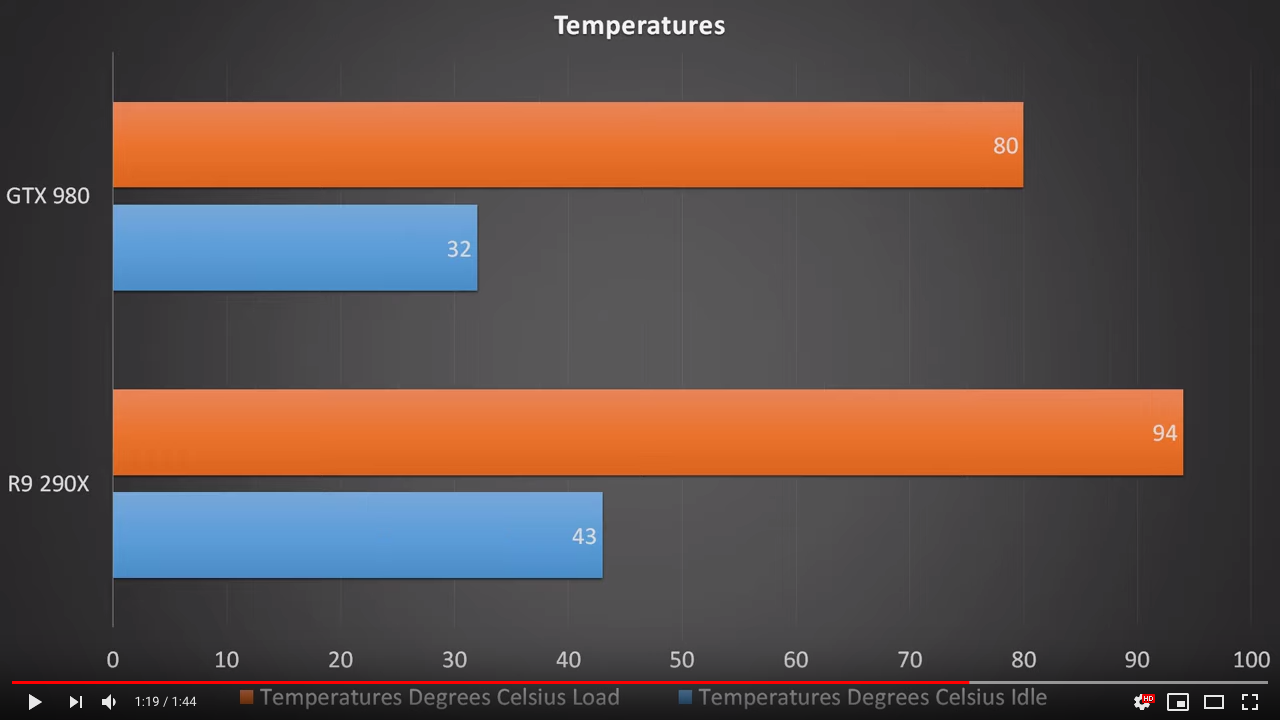

reddit/dataisugly/2wwxuy_2 reddit/dataisugly/2wwxuy c09c2f6b1fd0d01f ['reddit/dataisugly/2wwxuy_3', 'reddit/dataisugly/2wwxuy_9', 'reddit/dataisugly/2wwxuy_8', 'reddit/dataisugly/2wwxuy_1', 'reddit/dataisugly/2wwxuy_7', 'reddit/dataisugly/2wwxuy_6', 'reddit/dataisugly/2wwxuy_10', 'reddit/dataisugly/2wwxuy_5', 'reddit/dataisugly/2wwxuy_4', 'reddit/dataisugly/2wwxuy_0'] [] []


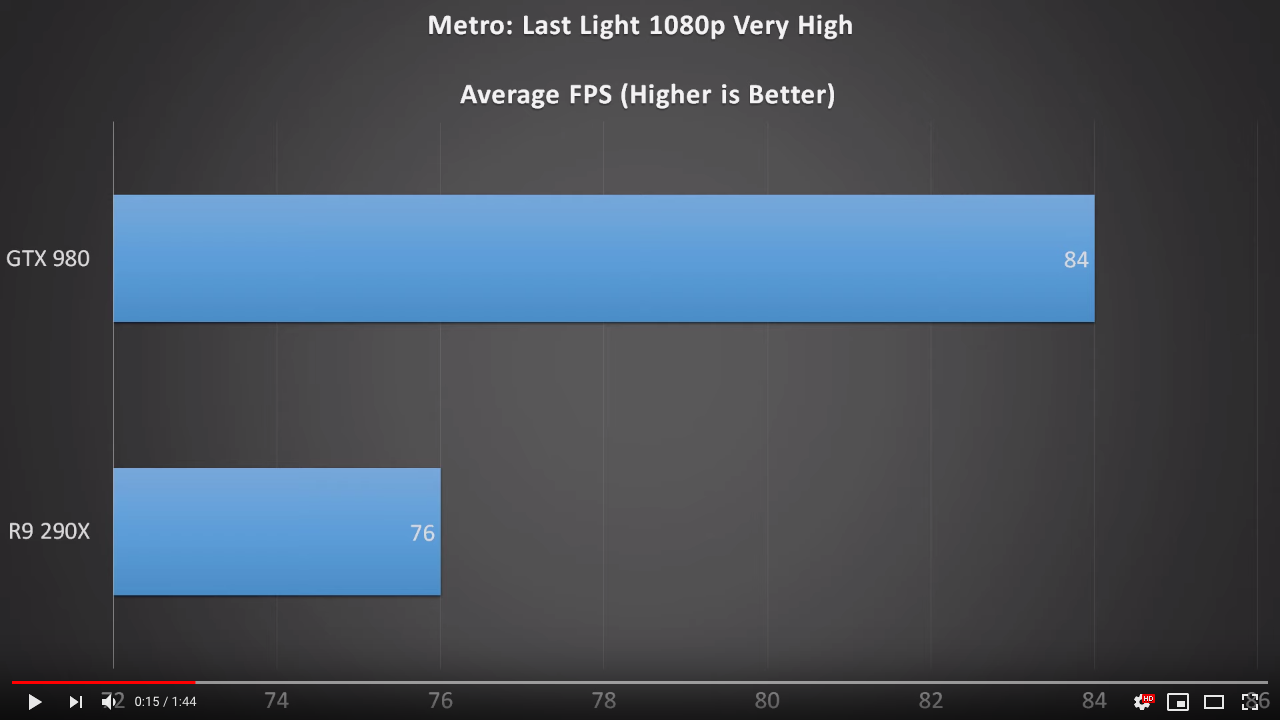

reddit/dataisugly/2wwxuy_7 reddit/dataisugly/2wwxuy d0952fca2fcbc095 ['reddit/dataisugly/2wwxuy_3', 'reddit/dataisugly/2wwxuy_9', 'reddit/dataisugly/2wwxuy_8', 'reddit/dataisugly/2wwxuy_1', 'reddit/dataisugly/2wwxuy_6', 'reddit/dataisugly/2wwxuy_2', 'reddit/dataisugly/2wwxuy_10', 'reddit/dataisugly/2wwxuy_5', 'reddit/dataisugly/2wwxuy_4', 'reddit/dataisugly/2wwxuy_0'] [] []


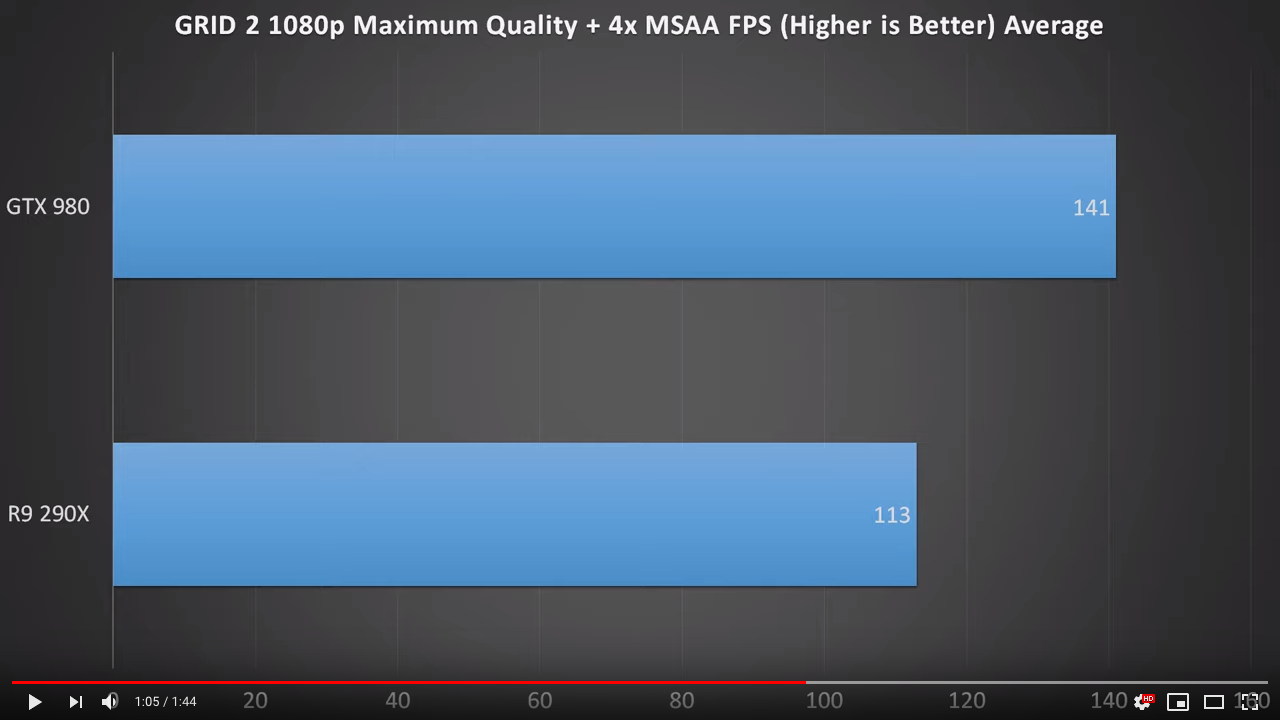

reddit/dataisugly/2wwxuy_8 reddit/dataisugly/2wwxuy d0da2f850f697895 ['reddit/dataisugly/2wwxuy_3', 'reddit/dataisugly/2wwxuy_9', 'reddit/dataisugly/2wwxuy_1', 'reddit/dataisugly/2wwxuy_7', 'reddit/dataisugly/2wwxuy_6', 'reddit/dataisugly/2wwxuy_2', 'reddit/dataisugly/2wwxuy_10', 'reddit/dataisugly/2wwxuy_5', 'reddit/dataisugly/2wwxuy_4', 'reddit/dataisugly/2wwxuy_0'] [] []


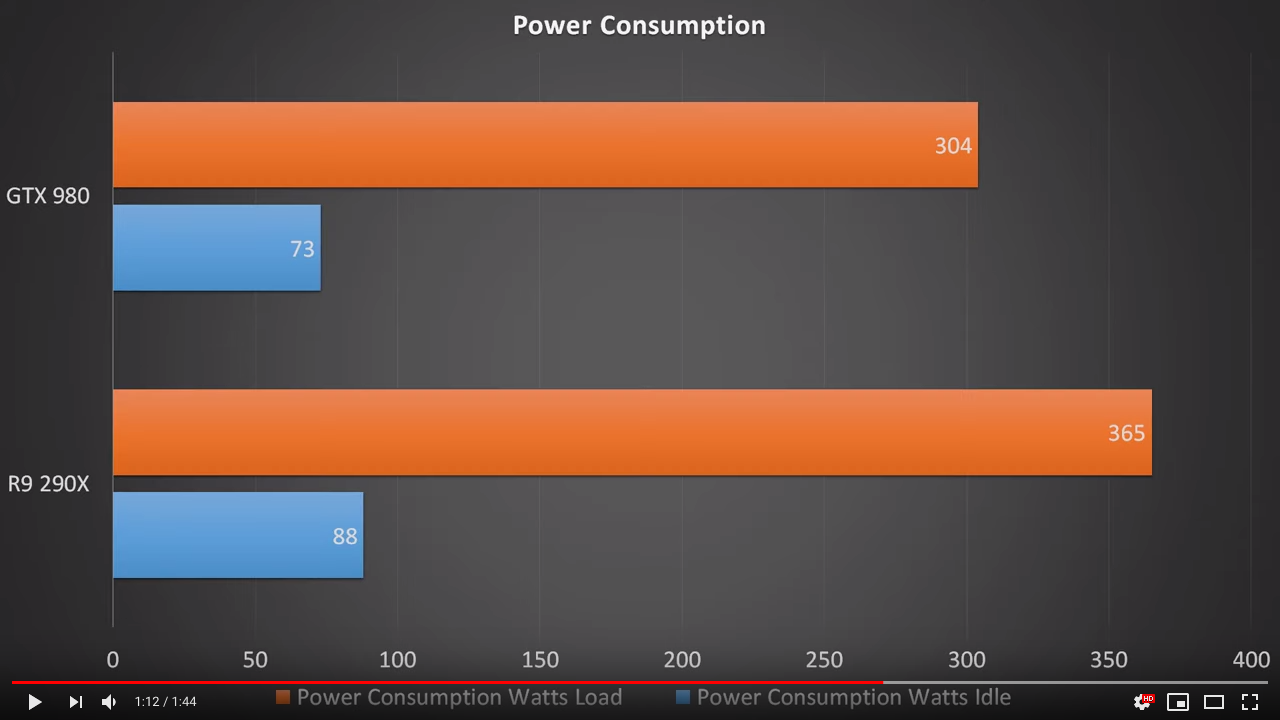

reddit/dataisugly/2wwxuy_6 reddit/dataisugly/2wwxuy c0953f6b3fc1c095 ['reddit/dataisugly/2wwxuy_3', 'reddit/dataisugly/2wwxuy_9', 'reddit/dataisugly/2wwxuy_8', 'reddit/dataisugly/2wwxuy_1', 'reddit/dataisugly/2wwxuy_7', 'reddit/dataisugly/2wwxuy_2', 'reddit/dataisugly/2wwxuy_10', 'reddit/dataisugly/2wwxuy_5', 'reddit/dataisugly/2wwxuy_4', 'reddit/dataisugly/2wwxuy_0'] [] []


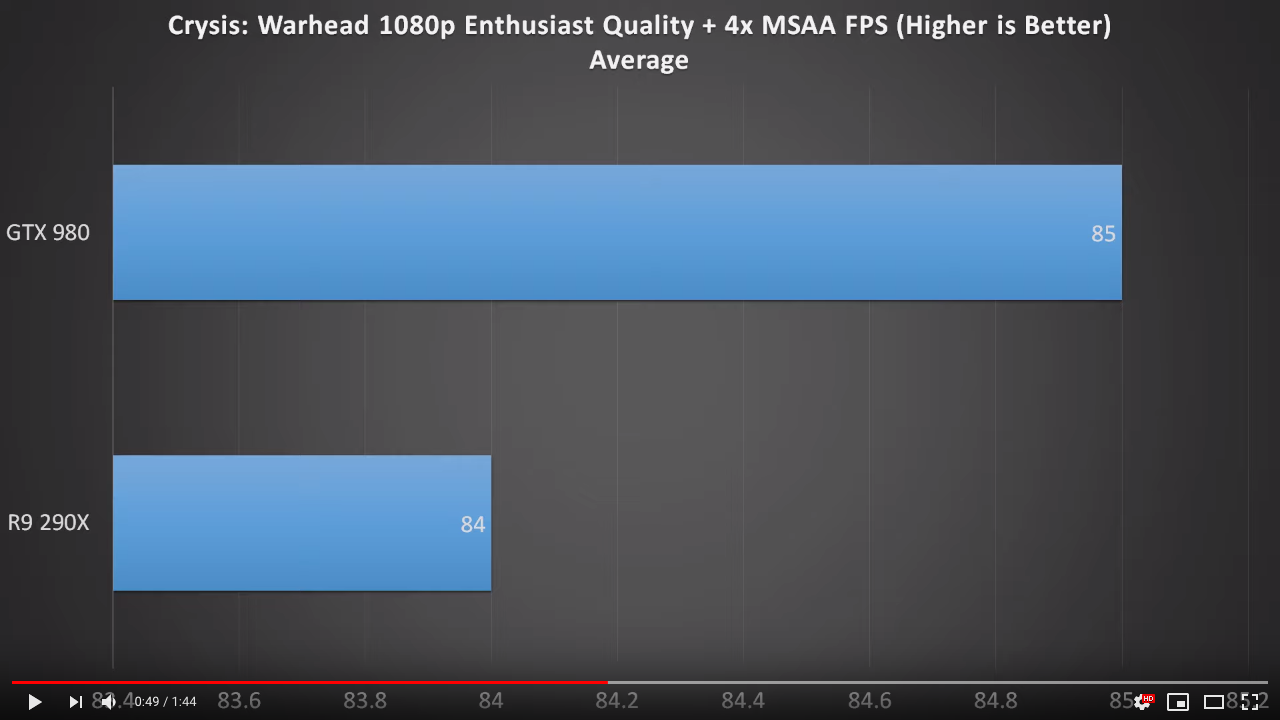

In [44]:
short_id = '2wwxuy_1'
if '_' in short_id:
    short_id = short_id.split('_')[0]
for i in imagededup.find({'id': short_id}):
    print(i['image_id'], i['post_id'], i['phash'], i['related_images'], i['duplicated_posts'], i['duplicated_images'])
    url = i['url']
    display(HTML(f"<a href={url}>{url}</a>"))
    display(HTML(f"<a href={i['external_link_url']}>{i['external_link_url']}</a>"))
    archive_url = f"http://web.archive.org/web/*/{i['external_link_url']}"
    display(HTML(f"<a href={archive_url}>{archive_url}</a>"))
    display(Image(filename=i['file_path']))

In [45]:
Counter([i['ext'] for i in imagemeta.find()])

Counter({'.png': 3242, '.jpg': 3408, '.gif': 88})

In [46]:
Counter([i['image_id'] for i in imagededup.find() if len(i['duplicated_images']) > 5])

Counter({'reddit/dataisugly/e2cvur_0': 1,
         'reddit/dataisugly/dly75r_0': 1,
         'reddit/dataisugly/4xrk13_0': 1,
         'reddit/dataisugly/2kacwz_0': 1})

In [47]:
Counter([len(i['duplicated_images']) for i in imagededup.find()])

Counter({0: 5110, 1: 622, 2: 74, 5: 1, 3: 23, 7: 2, 4: 6, 8: 2})

In [48]:
Counter([i['image_order'][0] for i in imagemeta.find()])

Counter({'external_link': 4282,
         'preview': 1307,
         'preview_alt': 512,
         'manual': 420,
         'archive': 127,
         'thumbnail_alt': 70,
         'external_link_alt': 7,
         'thumbnail': 13})

In [49]:
len({i['post_id'] for i in imagemeta.find()})

6294

In [50]:
len([i for i in imagemeta.find({'phash': 'c0de6a3e14613de5'})])

0

In [51]:
image_ids = ['reddit/dataisugly/1tclw5:0', 'reddit/dataisugly/28rgez:0', 'reddit/dataisugly/34xxf6:0', 'reddit/dataisugly/2x1the:0', 'reddit/dataisugly/245agu:0', 'reddit/dataisugly/5i4i7k:0', 'reddit/dataisugly/29fugw:0', 'reddit/dataisugly/2zrizi:0', 'reddit/dataisugly/1ktavo:0', 'reddit/dataisugly/1zzxxs:0', 'reddit/dataisugly/24ammj:0', 'reddit/dataisugly/36vg4y:0', 'reddit/dataisugly/308tua:0']

In [52]:
{imagemeta.find_one() for i in image_ids}

TypeError: unhashable type: 'dict'

In [53]:
Counter([i['phash'] for i in imagemeta.find()]).most_common()[:40]

[('c1cf027147e6e1e9', 6),
 ('af3a818d30b34f78', 6),
 ('ef8099adc231b94e', 5),
 ('ea7e94695a3e3828', 5),
 ('d1c66d8132b783b5', 4),
 ('e6b4994999666695', 4),
 ('c040e2aa7b5b1f97', 4),
 ('ab3cb5f1c0a4c3b2', 4),
 ('bf3e40611e6a751a', 4),
 ('8f684c1aba9bd1d1', 4),
 ('f5550a8a8e0f2f2d', 4),
 ('aec4f1d9e333c032', 4),
 ('b090cd6fb7613994', 4),
 ('a6c6d9d9d991cc30', 4),
 ('a080e7a69cb6da7a', 4),
 ('e297986a8d1ad879', 4),
 ('ff9911311f1b1915', 3),
 ('f9c0d71e99274a34', 3),
 ('cf495f6a49303b49', 3),
 ('c6c93f496e60c837', 3),
 ('c0d03fad372e7027', 3),
 ('cf7234ce836c88b3', 3),
 ('ea3c92d2cb4a2d3c', 3),
 ('c6c2e938904dedd3', 3),
 ('ea54156c4c9a3f95', 3),
 ('ba34b55bc23d93c0', 3),
 ('af66d43dc03dc02d', 3),
 ('d0c62f396ccf90c6', 3),
 ('b311ce1ee06bace2', 3),
 ('b30c9ce363cc8c37', 3),
 ('ea85959597706768', 3),
 ('b5f80cd313d58633', 3),
 ('c674ca81c927dc76', 3),
 ('fafaa5a45a4096d2', 3),
 ('acc6d3989330cb9b', 3),
 ('ff01805b017f057f', 3),
 ('ea7097cc93cae452', 3),
 ('e8b59e26334965d2', 3),
 ('af3694239

In [54]:
imageMeta = imagemeta.find_one({'phash': 'd4dc238f9f484f28'})

In [55]:
Image.open(imageMeta['file_path'])

AttributeError: type object 'Image' has no attribute 'open'

## Valid image URLs

In [56]:
all_posts = [p for p in posts.find()]

In [57]:
source_url = {'https://www.reddit.com/r/dataisugly', 'https://badvisualisations.tumblr.com/', 'https://viz.wtf/'}

In [58]:
output = [p for p in all_posts
              if p['source_url'] in source_url and
                 p['preview']['url'] != '' and
                 p['thumbnail']['url'] != '' and
                 p['media_type'] == 'image'
         ]
len(output) # expected to have valid images

4724

In [59]:
results = [r for r in db['dlarchiveresults'].find() if 'status' in r and (r['status'] == 'exists' or r['status'] == 'downloaded')]
len(results)

181

In [60]:
results = [r for r in db['dlarchiveresults'].find() if 'status' in r and r['status'] == 'skip_content_type']
len(results)

471

In [61]:
results = [r for r in db['dlarchiveresults'].find() if 'archive_status' in r and r['archive_status'] == 'archive_not_found']
len(results)

1146

In [62]:
Counter([r['status'] for r in db['dlarchiveresults'].find() if 'status' in r])

Counter({'exists': 169,
         'downloaded': 12,
         'skip_content_type': 471,
         'invalid_content_type': 5})

In [63]:
%%time
posts_with_image = [p for p in posts.find() if glob.glob(f"images/*/*/*/{p['id']}*")]

CPU times: user 2min 25s, sys: 1min 13s, total: 3min 39s
Wall time: 3min 44s


In [64]:
len(posts_with_image)

6393

In [65]:
len(all_posts) - len(posts_with_image)

764

In [66]:
for p in [posts.find_one()]:
    print(p['id'])
    print(glob.glob(f"images/*/*/*/{p['id']}*"))

ehsr2o
['images/external_link/reddit/dataisugly/ehsr2o.jpg']


In [67]:
Counter([p['id'] for p in all_posts]).most_common()[:10]

[('ehsr2o', 1),
 ('eh9a95', 1),
 ('eh7wox', 1),
 ('ehafnl', 1),
 ('ehsqv3', 1),
 ('eh7yy8', 1),
 ('egxxpg', 1),
 ('eh4mzc', 1),
 ('eh1hmw', 1),
 ('egx0fl', 1)]

In [68]:
Counter([os.path.splitext(name)[1] for _, _, files in os.walk(images_dir) for name in files])

Counter({'.jpg': 16665, '.png': 6051, '.gif': 160})

# Download results

In [69]:
# df_dl_preview_results = pd.DataFrame.from_records(dl_preview_results)
# df_dl_preview_results.loc[(df_dl_preview_results['status'] != 'exists') &
#                           (df_dl_preview_results['status'] != 'invalid_url') &
#                           (~df_dl_preview_results['status'].isnull()) &
#                           (df_dl_preview_results['status'] != 'downloaded')].to_csv('./dl_preview_results.csv', index=False)

In [70]:
# df_dl_thumbnail_results = pd.DataFrame.from_records(dl_thumbnail_results)
# df_dl_thumbnail_results.loc[(df_dl_thumbnail_results['status'] != 'exists') &
#                             (df_dl_thumbnail_results['status'] != 'invalid_url') &
#                             (~df_dl_thumbnail_results['status'].isnull()) &
#                             (df_dl_thumbnail_results['status'] != 'downloaded')].to_csv('./dl_thumbnail_results.csv', index=False)

In [71]:
# df_dl_external_link_results = pd.DataFrame.from_records(dl_external_link_results)
# df_dl_external_link_results.loc[(df_dl_external_link_results['status'] != 'exists') &
#                           (df_dl_external_link_results['status'] != 'invalid_url') &
# #                           (df_dl_external_link_results['status'] != 'not_found') &
# #                           (df_dl_external_link_results['status'] != 'http_error') &
#                           (~df_dl_external_link_results['status'].isnull()) &
#                           (~df_dl_external_link_results['status'].str.contains('skip_')) &
#                           (df_dl_external_link_results['status'] != 'downloaded')].to_csv('./dl_external_link_results.csv', index=False)

## Tags

In [72]:
c = Counter([t for p in posts.find() for t in p['tags']])

In [73]:
c.most_common()[:50]

[('Bad Scale', 402),
 ('Clusterfuck', 230),
 ('Pie Gore', 214),
 ('What the Fuck?', 178),
 ('OC', 158),
 ('Agendas Gone Wild', 136),
 ('Area/Volume', 58),
 ('R2: Nothing wrong', 55),
 ('Flawed Flows', 35),
 ('3D is Cool!', 34),
 ('R1: Parody', 31),
 ('R3: Dataisbeautiful', 19),
 ('Advice', 18),
 ('Mostly OK', 18),
 ('R4: Repost', 11),
 ('META', 7),
 ('Data', 5),
 ('R3(b): Dataisbeautiful', 5),
 ('Media', 5),
 ('R3: Brigading/Dataisbeautiful', 5),
 ('Meta', 5),
 ('R0: Meme', 4),
 ('Discussion', 4),
 ('Map', 4),
 ('Pendiente', 4),
 ('Image', 4),
 ('R4: Unclear Explanation', 4),
 ('Rem: R1', 3),
 ('R2: Nothing wrong R3: Dataisbeautiful', 3),
 ('R1: Parody R2: Nothing wrong', 3),
 ('Original Content', 3),
 ('Photo', 3),
 ('R3: Brigading', 3),
 ('Legendary Labels', 3),
 ('R3: No/improper citation', 3),
 ('R0: Meme R1: Parody', 2),
 ('DISCUSSION', 2),
 ('Removed: out of context', 2),
 ('News', 2),
 ('/r/ALL', 2),
 ('OWL', 2),
 ('Politics', 2),
 ('R2: Nothing wrong R3: Brigading', 2),
 ('Remo

## Author

In [74]:
c = Counter([p['author'] for p in posts.find() if 'author' in p])

In [75]:
c.most_common()[:50]

[('', 1502),
 ('rhiever', 83),
 ('CJMinard', 59),
 ('zonination', 37),
 ('minimaxir', 36),
 ('akeemtheafricandream', 28),
 ('NelsonMinar', 26),
 ('jensyao', 20),
 ('confused_confucius07', 19),
 ('ProgVal', 17),
 ('OllyTwist', 17),
 ('Epistaxis', 15),
 ('Renegade_Meister', 15),
 ('denacioust', 14),
 ('zevobh', 14),
 ('almodozo', 11),
 ('misnamed', 11),
 ('suity1', 10),
 ('gabgug', 10),
 ('wspaniel', 10),
 ('phil_blumpkin', 10),
 ('WE_THEPEOPLE', 10),
 ('SymphMeta', 10),
 ('iqueerified', 9),
 ('colako', 8),
 ('Thefriendlyfaceplant', 8),
 ('MatthewLaw', 8),
 ('crvc', 8),
 ('WHY_DO_I_SHOUT', 8),
 ('Batrachus', 8),
 ('pongpingpongpingpong', 7),
 ('DiamondMinah', 7),
 ('rocketman0739', 7),
 ('nate_silver_surfer', 7),
 ('Curran919', 7),
 ('toot_ma_boot', 7),
 ('Null_HHockey', 7),
 ('Catharrrsis', 7),
 ('mrdelayer', 7),
 ('wheresflateric', 6),
 ('Reddits_Worst_Night', 6),
 ('bubbles212', 6),
 ('ofsinope', 6),
 ('--DrScience--', 6),
 ('ar_604', 6),
 ('owmyfoothurts', 6),
 ('vbevan', 6),
 ('vern